# ML Technique: T-SNE
T-sne is a dimension reduction algorithm. It's best used to visualize data with lots of features in 2D space.

# NKI Breast Cancer Data
To demonstrate through example,  we will use the NKI Breast Cancer Dataset [[1]](https://www.google.com/url?q=https://data.world/deviramanan2016/nki-breast-cancer-data&sa=D&source=docs&ust=1660151201266258&usg=AOvVaw3zOXI33wxSbCse84FI3RYY). This dataset contains gene transcription information for 273 samples. There are 3 patient attributes, 10 discrete clinical attributes, and 1554 gene attributes. Each gene attribute is a normalized ratio using common gene expression profiling techniques [[2]](https://www.nature.com/articles/415530a). 



In [2]:
import pandas as pd

# Load the data from data.world's url
df = pd.read_csv('https://query.data.world/s/qzn232rzd3msuxgnlewq4af3i4wuz7')

df.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


# Low Dimentional Visualization

There are many questions we could ask with such a rich dataset. "What genes correlate with each other? Can we predict survival based only on gene expression? What are the most important features when considering survival?" These questions have been addressed (to some extent) in research papers. [Wu et. al.](https://www.scirp.org/journal/paperinformation.aspx?paperid=84902) applies all the common classical machine learning techniques such as PCA, linear regression, SVM, random forest, and logistic regression. [Nicolaua et. al.](https://d1bp1ynq8xms31.cloudfront.net/wp-content/uploads/2015/02/Topology_Based_Data_Analysis_Identifies_a_Subgroup_of_Breast_Cancer_with_a_unique_mutational_profile_and_excellent_survival.pdf) uses a more advanced topology method to discover a subset of genes (c-MYB+) that, when exhibited, correlate to a 100% chance of survival. They are of a bit different caliber, but well worth a quick read if you would like to learn more about the data.

Today we will focus on the best way to visualize this data. Of course, there are many ways to visualize one feature at a time. Here are two ways to show the distribution of age and survival time, respectively:


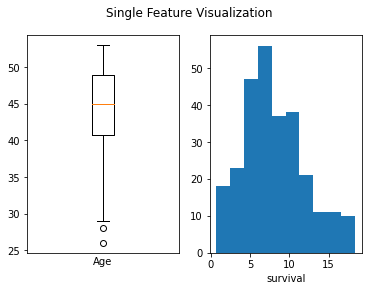

In [34]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.suptitle('Single Feature Visualization')

plt.title('Cancer Data')
plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.xticks([])
plt.xlabel('Age')

plt.subplot(1, 2, 2)
plt.hist(df['survival'])
plt.xlabel('survival')
plt.show()

We can also fairly easily plot 2 dimensions of data at a time:

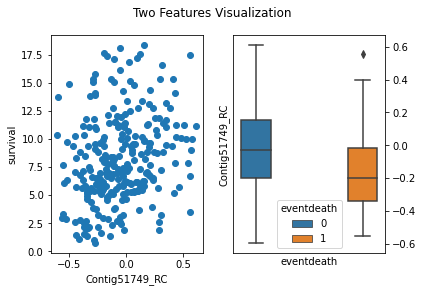

In [46]:
plt.figure(2)
plt.suptitle('Two Features Visualization')
plt.subplot(1, 2, 1)
plt.scatter(df['Contig51749_RC'], df['survival'])
plt.xlabel('Contig51749_RC')
plt.ylabel('survival')

plt.subplot(1, 2, 2)
import seaborn as sns
import numpy as np
sns.boxplot(x='eventdeath', y='Contig51749_RC', data=df, hue='eventdeath')
plt.gca().yaxis.tick_right() 
plt.xticks([])
plt.show()

Taking a look at one gene: `Contig51749_NC`. We can see how the expression of this gene corresponds to the survival time or survival rate.

In reality, it would be much more useful to take in account all the genes. To do that, we will use T-SNE.
